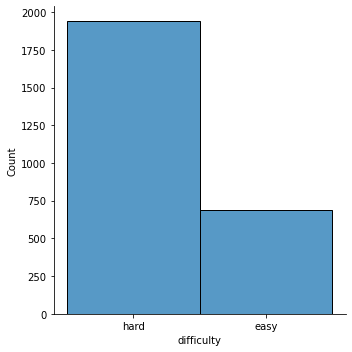

In [30]:
import pandas as pd
import numpy as np
import filetype 
import seaborn as sns
filepath='../../../data/raw/chord-fingers.csv'

def load_n_process(filepath):
    df1 = (
        pd.read_csv(filepath,  delimiter = ';')
        #rename columns to shortened/abbreviated names
        .rename(columns={'CHORD_ROOT':'root','CHORD_TYPE':'type','CHORD_STRUCTURE':'struct','FINGER_POSITIONS':'f_pos','NOTE_NAMES':'notes'})
        #create difficulty column and assign values easy or hard based on chord root and type
        .assign(difficulty=lambda x: np.where((x.type=='maj')&(x.root=='A')|(x.root=='C')|(x.root=='G')|(x.root=='D'),'easy','hard'))
        #sort df based on difficulty
        #.loc[lambda x: x['difficulty']=='easy']
        #display chord roots in alphabetical order
        .sort_values('root', ascending=True)
        #Describe the data
    )
    return df1
def descData(dataframe):
    return dataframe.describe().T
def getInfo(dataframe):
    return dataframe.info()
def countInstanceViz(df, x_axis):
    sns.displot(df[x_axis])

df = load_n_process(filepath)
descData(df)
df
#visualization of hard vs easy guitar chords 
countInstanceViz(df,'difficulty')